<br>

# Introduction

This project shows: 
- ability of writing solid,structured Python code 
- ability of using existing utilities(libraries) for processing and analyzing data.
- analytical and data pre-processing skills

Project is mainly focused on data pre-processing. I showed my techniques in dealing with most common problems with data:
1. missing data
2. duplicate
3. abnormal values. 

Project also contains NLP part, where I show the algorithms that I have learned. Moreover, I have demonstrated my ability to effectively present the results to the team by visualizing and summarizing the insights that I have found through out the research.

Project on the topic "**Data Preprocessing**" of the training course "[Specialist in Data Science](https://practicum.yandex.com/data-scientist)" by [Yandex Practicum](https://practicum.yandex.com/). Dataset of the project is provided by the [Yandex Practicum](https://practicum.yandex.com/).

Libraries that I have used in this project:

 |Library           |Version            |
 |:---------------|:------------------------|
|Pandas      | 0.25.1                |
|Numpy        |1.18.3              |
|nltk        |3.4.1               |
|matplotlib        |3.1.0                |
|seaborn       |0.11.0              |
|missingno        |0.4.2                |

## Setting up the project

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
# Installing missingno for identifying type of missing values at *data-cleaning* stage.
!pip3 install missingno

# Project "Analyzing borrowers’ risk of defaulting" 


## Description

Customer - bank. We need to answer the question: whether the family status and number of children will have an impact on the fact of repayment of the loan on time. 

## Objective

Conduct a research on data provided by the bank. The results of the research will be considerer in building a [**credit score**](https://en.wikipedia.org/wiki/Credit_score) model that assesses the potential borrower's ability to repay the loan to the bank.

## Data description

Data input from the bank - statistics on customers' ability to pay. Each row of the table provides information about the client of the bank: the number of children in the family, employment history, age, education, marital status, gender, type of employment, whether customer had any debts, monthly income, and the purpose of obtaining credit.

 |Column            |Description            |
 |:---------------|:------------------------|
|children        |number of childern in family                 |
|days_employed        |record of employment in days                |
|dob_years        |customer age in years               |
|education        |customer education level                 |
|education_id        |customer education level id                 |
|family_status        |family status                 |
|family_status_id        |family status id                 |
|gender        |gender                 |
|income_type        |type of employment                 |
|debt        |whether a customer was in debt                |
|total_income        |monthly total income  in Rubles             |
|purpose        |purpose to get a loan                 |


## Work plan

1. [Overview of data](#review)
2. [Data preprocessing](#data-preproccessing)
    - [Column processing](#columnProcessing)
    - [Missing values](#missingValues)
    - [Changing data types](#dataTypes)
    - [Duplicate values](#duplicateValues)
    - [Abnormal values](#abnormalValues)
    - [Categorizing data](#categorizingData)
        1. [Purpose (NLP part)](#purpose)
            - [Stemming](#stemming)
            - [Lemmatization](#lemmatization)
        2. [Children presence](#childrenPresence)
        3. [Income level](#total_income)
3. [Data analysis and documentation of results](#analysis)
    - [The effect of having children on the repayment of the loan on time](#childrenImpact)
    - [The impact of family status on the repayment of the loan on time](#familyStatusImpact)
    - [Correlation between income level and loan repayment on time](#levelIncomeImpact)
    - [The impact of loan purposes on its repayment on time](#purposeImpact)
4. [Results of the research](#results)

<br>

<a id="review"></a>
# Stage 1 - Overview of data

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
# NLP libraries for categorizing data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# stopwords for doing lemmatization and stemming
from nltk.corpus import stopwords 
# Lemmatization
from nltk.stem import WordNetLemmatizer
# Stemming
from nltk.stem import SnowballStemmer
from collections import Counter
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For identifing missing values type
import missingno as msno

[nltk_data] Downloading package stopwords to /Users/bork/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bork/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/bork/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Reading the data and saving it in `bank_stats` variable.

In [4]:
bank_stats = pd.read_csv('./dataset/data_credit_scoring.csv')

Let's study our data by displaying the first 10 lines with help of [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head) method.

In [5]:
bank_stats.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
5,0,-926.185831,27,masters degree,0,civil partnership,1,M,partner,0,255763.565419,purchase of the house
6,0,-2879.202052,43,masters degree,0,married,0,F,partner,0,240525.971920,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,135823.934197,education
8,2,-6929.865299,35,MASTERS DEGREE,0,civil partnership,1,F,employee,0,95856.832424,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,144425.938277,purchase of the house for my family


Note that we have negative values in column *days_employed*, we should process this column. Otherwise, we will get incorrect results of our research. Also, same education level text is written in uppercase and lowercase. For example, Secondary education, SECONDARY EDUCATION, secondary education. Most likely we have an error in the data recording.

Displaying general information about the table by using [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) method.

In [6]:
bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Let's take a closer look at the information. There are 12 columns in the table. 2 columns have missing data: *days_employed*,*total_income*. The data types differ between columns (*float64*,*int64*,*object*)

Displaying the central tendency, dispersion and shape of a dataset’s distribution by using [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method.

In [7]:
bank_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,2.000000e+01
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,4.017554e+05
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,7.500000e+01
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000e+00
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000e+00
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000e+00
total_income,19351.0,167422.302208,102971.566448,20667.263793,103053.152913,145017.937533,203435.067663,2.265604e+06


<br>
Some observations that have come to mind with during the data overview.
<br>

|Column            |Description                                    |Type of variable|Comment|
|---------------:|:-----------------------------------------|:-|:-----------------|
|children        |number of childern in family                 |Quantitative|Мinimum (-1) and maximum (20) values are raising concern in data correctness.|
|days_employed   |record of employment in days              |Quantitative|We have great scatter in data. There are negative and missing values. Maximum value 4.017554e+05([scientific notation](https://en.wikipedia.org/wiki/Scientific_notation)). If we translate days into year, we will get ~1100 years, which is unreal. We should take this into consideration when we will be at preprocessing stage. Most likely we have an error in the data recording. |
|dob_years       |customer age in years                   |Quantitative|
|education       |customer education level                |Categorical|Same education level text is written in uppercase and lowercase. For example, Secondary education, SECONDARY EDUCATION, secondary education. Most likely we have an error in the data recording.|
|education_id    |customer education level id          |Categorical|
|family_status   |family status                       |Categorical|
|family_status_id|family status id         |Categorical|
|gender          |gender                              |Categorical|**F** - female, **M** - male.|
|income_type     |type of employment                           |Categorical|
|debt            |whether a customer was in debt |Categorical| **1** - customer have been in debt previously. **0** - customer haven't been in debt|
|total_income    |monthly total income                       |Quantitative |We have missing values,which indicate that either customer does not have a job at the moment or customer haven't filled in *total_income* field, most likely there is an error in the data recording.|
|purpose         |purpose to get a loan           |Categorical |This field contains text, which tells about the purpose of getting a loan. We should implement [NLP](https://en.wikipedia.org/wiki/Natural_language_processing), especially, [lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) to categorize strings.|

## Summary

- The first thing that caught my eye is the negative values in *record of employment in days* field. Most likely there is an error in the data. 
- We also have missing values in 2 columns: *days_employed*,*total_income* - most likely either we have an error in data recording or there is a possibility that customer forgot to fill in those fields or haven't had any job at the moment.
- Also, there is a certain anomaly in column *days_employed* - the bank customer has a total work experience of 1100 years. Most likely this anomaly is due to incorrect data recording. 
- Same education level text is written in uppercase and lowercase. For example, Secondary education, SECONDARY EDUCATION, secondary education. Most likely we have an error in the data recording.
- As for the columns, in general, there is no problem with the names of the columns. However, I would replace the `dob_years` column name to `age` because `age` describes the customer's age better than `dob_years` in short form.
- The number of values in the columns varies. Consequently, there are missing values that need to be processed for further research.
- Moreover, we have to check data for duplicate and abnormal values.

Things that we have to do:
1. Replace column names with appropriate ones
2. Process missing values.
3. Check for duplicate values and process them.
4. Check for abnormal values.
4. Categorize data
5. Answer the questions

Let's move on to data preprocessing stage.

<br>

---

<a id="data-preproccessing"></a>
# Stage 2 - Data preprocessing 

*Data pre-processing* or *data cleaning* stage is important. We will not reach the satisfied result until the data is being pre-processed/prepared. So, data needs to be prepared. This stage involves finding problems  that might be in the data, as well as solving these problems. At this stage we have to:
1. Replace column names with appropriate ones.
2. Process missing values.
3. Change data types
4. Check for duplicate values and process them.
5. Check for abnormal values.
6. Prepare data for further analysis. In our case, we have to categorize data.

Let's begin with column processing.

<a id="columnProcessing"></a>
## Column processing

Let's display columns by accesing attribute *columns*. Maybe we will find more errors.

In [8]:
bank_stats.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

As you can see, there are no extra spaces. All columns are written in same case - lower case. Let's rename the column for further work, in our case, replace *dob_years* with *age*. In order to replace the column name, we will use [rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename) method.

In [9]:
bank_stats = bank_stats.rename(columns={'dob_years':'age'})

Check the result.

In [10]:
bank_stats.columns

Index(['children', 'days_employed', 'age', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Great, we have replaced the name of the column. Let's move on processing missing values.

<a id="missingValues"></a>
## Missing values

At the overview stage, we have found out that we have missing values. Missing values often occur because of technical or human errors during data entry, so we have to find out whether it was cause by human factor or technical factor. Let's see how many we have in each column by using the set of methods [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html?highlight=isna#pandas.DataFrame.isna) and [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum).

In [11]:
bank_stats.isna().sum()

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Let’s visualize its missing values using a matrix plot:

P.S please refer to this official documentation https://github.com/ResidentMario/missingno You can find those methods there.

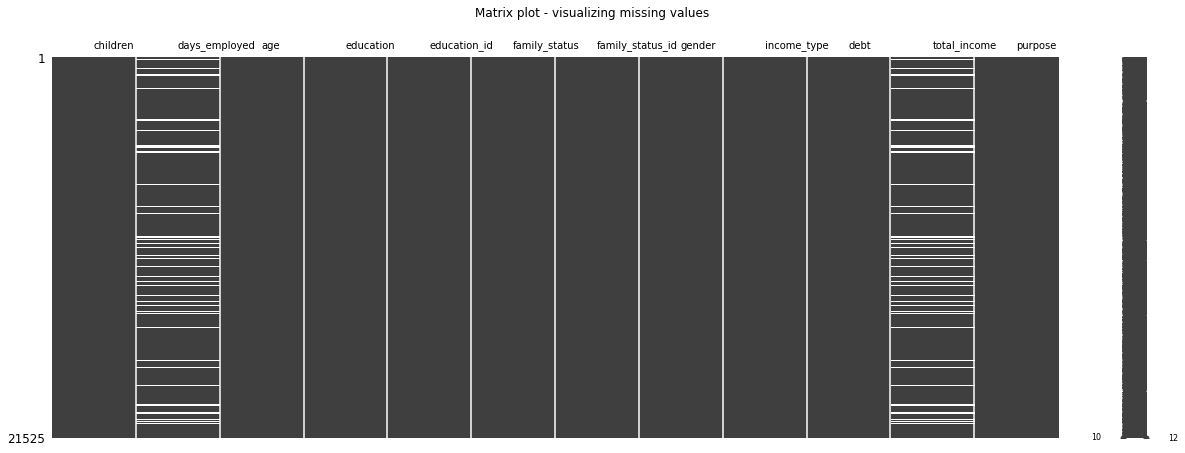

In [12]:
msno.matrix(bank_stats,figsize=(20,7),fontsize=10);
plt.xticks(rotation=0)
plt.suptitle('Matrix plot - visualizing missing values')
plt.show()

To find out if the missingness has any [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) with any of the existing variables, we will use a correlation heatmap. 

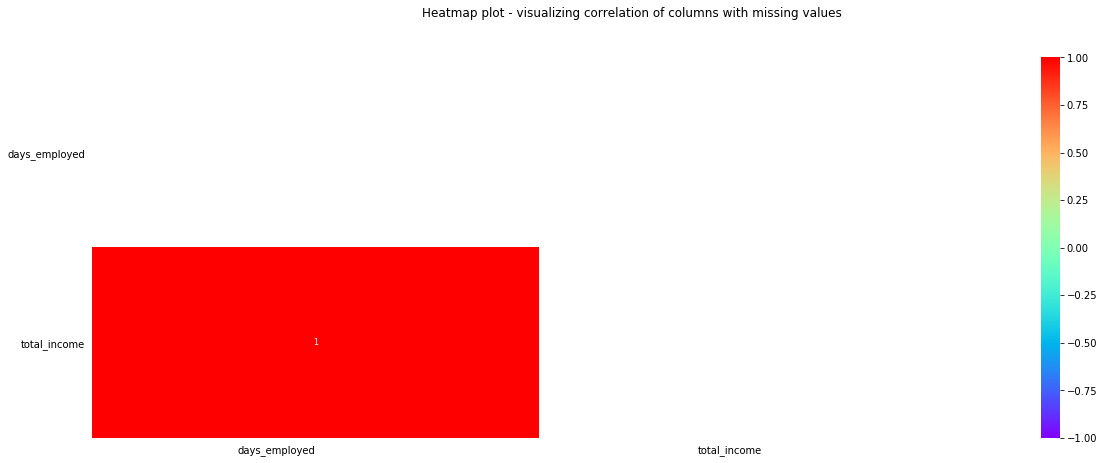

In [13]:
msno.heatmap(bank_stats, cmap='rainbow',figsize=(20,7),fontsize=10)
plt.xticks(rotation=0)
plt.suptitle('Heatmap plot - visualizing correlation of columns with missing values')
plt.show()

Regarding the graphs, we can say that column *days_employed* is highly dependent on the missingness of column *total_income* and vice-versa.

It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem.

In [14]:
total_cells = np.product(bank_stats.shape)
total_missing = bank_stats.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.683313975996903


It's quite a lot.. *4348* values missed. We found out which columns have missing values. Let's take a closer look at the `days_employed` and `total_income` columns. It is good to mention that in both columns, we have the same amount of missing values.Missing values of `days_employed` are accompanied by missing values in `total_income` and vice versa. These two fields are uniquely related: missing data in one means missing data in the other. We have encountered one type of missing values - *MNAR* (*Missing not at random*). [Here](https://towardsdatascience.com/how-to-identify-missingness-types-with-missingno-61cfe0449ad9)'s good article about types of missing values. Missing values indicate that we have a problem with the data record, or clients intentionally left out the information in the total employment history and monthly income fields  or haven't had any job at the moment. It is better to reach out to a person/customer ,who gave the data, to get more information. In our case, we failed in reaching our the customer and we will try use our intuition.

Let's make a function that will print the number of missing values. It will help us in the future.

In [15]:
def checkMissingValues(columnName,df):
    """ This function prints the number of missing values of a dataframe and column specified in parameters """
    """ columnName - column name """
    """ df - dataframe """
    print(columnName,"checking for missing values, number of rows with missing value: ",len(df[df[columnName].isna()]))

Let's find the lines with the missing value in `days_employed`. Display the first 5 lines.

In [16]:
bank_stats[bank_stats['days_employed'].isnull()].head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


To solve the problem in the `days_employed` column, we need to fill these values with the median. Before calculating the median, we need to solve the problem of negative total years of service and make sure that there are no abnormal values in the `days_employed` column.

Let's use the [abs()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.abs.html?highlight=abs) method to solve the negative years of service

In [17]:
bank_stats['days_employed'] = bank_stats['days_employed'].abs()

Let's check the result. Make sure there are no more negative values in the `days_employed` column.

In [18]:
countNegativeValues = bank_stats[bank_stats['days_employed'] < 0].count().sum()
#displaying countNegativeValues 
countNegativeValues

0

Let's convert the total length of service in days to total length of service in years and change the name from `days_employed` to `years_employed`.

In [19]:
# Divide the total length of service in days by 262 working days in 2020. https://hr.uiowa.edu/pay/payroll-services/payroll-calendars/working-day-payroll-calendar-2020
bank_stats['days_employed'] = bank_stats['days_employed'] / 262
# Renaming the column to years_employed
bank_stats = bank_stats.rename(columns={'days_employed':'years_employed'})

Let's take the maximum years of service ~ 47 years and see how many rows exceed this value and save it in a separate table `above_years_employed`. 

In [20]:
above_years_employed = bank_stats[bank_stats['years_employed'] > 47]
above_years_employed['years_employed'].count().sum()

3521

*3521* rows that exceeeds the maximum years of service. First, let's take a look at the result by displaying the first 5 rows.

In [21]:
above_years_employed.head()

,children,years_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,1298.725466,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
18,0,1527.790599,53,secondary education,1,widow / widower,2,F,retiree,0,56823.777243,buying a second-hand car
24,1,1292.183026,57,secondary education,1,unmarried,4,F,retiree,0,290547.235997,transactions with the residential real estate
25,0,1387.589654,67,secondary education,1,married,0,M,retiree,0,55112.757732,buy real estate
30,1,1280.846063,62,secondary education,1,married,0,F,retiree,0,171456.067993,transactions with the residential real estate


Let's see what type of employment prevails in this table by calling the [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts) method.

In [22]:
above_years_employed['income_type'].value_counts()

retiree          3443
employee           49
partner            14
civil servant      13
unempoyed           2
Name: income_type, dtype: int64

As we can see, most of the values are made up of retirees. Let's compare the number of retirees with an abnormal value with the total number of retirees in our original table by using a set of methods [count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html?highlight=count#pandas.DataFrame.count) and [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum) methods.

In [23]:
elderly_years_employed = bank_stats[bank_stats['income_type']=='пенсионер']['years_employed'].count().sum()
elderly_above_years_employed = above_years_employed[above_years_employed['income_type']=='пенсионер']['years_employed'].count().sum()

# comparing number of retirees with abnormal values with number of retirees of original table
if (elderly_years_employed==elderly_above_years_employed):
    print('values are the same')
else:
    print('values are not the same')

values are the same


As we can see, the values matched. Consequently, we can replace our abnormal values with the average value. Let's turn to the information on the average number of years of service. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410005501 . For retirees, we can take the maximum number of years of service ~20 years and more. For others, let's take the average ~8 years according to the website.

In [24]:
bank_stats.loc[(bank_stats['income_type']=='retiree') & (bank_stats['years_employed'] > 47), 'years_employed'] = 20

Let's check the result

In [25]:
bank_stats[bank_stats['years_employed'] > 47]['years_employed'].count().sum()

78

For others, we assign the average ~8 years.

In [26]:
bank_stats.loc[bank_stats['years_employed'] > 47, 'years_employed'] = 8

Calculate the median in the `years_employed` column, process the rows with missing values with median.

In [27]:
# Removing zero values
non_zero_years_employed = bank_stats.years_employed != 0
# Calculating median
median_years_employed = bank_stats.loc[non_zero_years_employed,:]['years_employed'].median()

# fill missing values with fillna() method https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna
bank_stats['years_employed'] = bank_stats['years_employed'].fillna(median_years_employed)

Let's check the work by calling our custom function *checkMissingValues()*

In [28]:
checkMissingValues('years_employed',bank_stats)

years_employed checking for missing values, number of rows with missing value:  0


Great, let's move on to *total_income* column.

Let's group the data by income_type. We will find the medians and averages. First, let's see how many clients the bank has in each employment type category by using [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts) method.

In [29]:
bank_stats['income_type'].value_counts()

employee                       11119
partner                         5085
retiree                         3856
civil servant                   1459
unempoyed                          2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Let's take for the median category: *employee,partner,retiree,civil servant* because they make up the majority of bank customers.

In [30]:
main_pick = bank_stats['income_type'].isin(['employee', 'partner', 'retiree', 'civil servant'])
# Removing zero values for calculating median
non_zero_total = bank_stats.total_income != 0
# Calculating median, grouping by income_type. We use a set of methods https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby 
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.median.html?highlight=median#pandas.core.groupby.GroupBy.median
medians = bank_stats.loc[main_pick & non_zero_total,:].groupby('income_type')['total_income'].median()
medians

income_type
civil servant    150447.935283
employee         142594.396847
partner          172357.950966
retiree          118514.486412
Name: total_income, dtype: float64

Group the remaining categories and calculate the mean.

In [31]:
# mean() method - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html?highlight=mean#pandas.core.groupby.GroupBy.mean
means = bank_stats.loc[~main_pick & non_zero_total,:].groupby('income_type')['total_income'].mean()
means

income_type
entrepreneur                   499163.144947
paternity / maternity leave     53829.130729
student                         98201.625314
unempoyed                      131339.751676
Name: total_income, dtype: float64

In [32]:
# Combining resulting tables
# Append() method - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html?highlight=append#pandas.DataFrame.append
total_dict = medians.append(means)
# Displaying the resulting dictionary
total_dict

income_type
civil servant                  150447.935283
employee                       142594.396847
partner                        172357.950966
retiree                        118514.486412
entrepreneur                   499163.144947
paternity / maternity leave     53829.130729
student                         98201.625314
unempoyed                      131339.751676
Name: total_income, dtype: float64

Let's make a function that will return a value from the dictionary. 

In [33]:
def fill_total(row,dictionary,by):
    """This function returns a value from the dictionary and will be applied to the row"""
    """row - row that gets passed from our dataframe"""
    """dictionary - our total_dict where we will get the value total_income"""
    """by - based on specified column, we will be getting the value from our dictionary"""
    return dictionary[row[by]]

Example:

We pass a row specifying the income_type column. For example the value of that column and row will be "*employee*". It will return the value based on the income_type from the dictionary.

In [34]:
total_dict['employee']

142594.39684740017

Let's apply our function to our dataframe, filling in the missing values in the *total_income* column. We will use [apply()](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply) method.

In [35]:
# Assign the values from the resulting Series(dictionary) to the rows with the missing value of the total_income column
bank_stats.loc[bank_stats.total_income.isna()==True,'total_income']= bank_stats.loc[bank_stats.total_income.isna()==True].apply(fill_total
                                                                                                                                ,dictionary = total_dict
                                                                                                                                ,by='income_type'
                                                                                                                                ,axis=1)

Checking the result

In [36]:
checkMissingValues('total_income',bank_stats)

total_income checking for missing values, number of rows with missing value:  0


In [37]:
bank_stats.isna().sum()

children            0
years_employed      0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

We have processed the missing values. Let's move on changing data types.

<a id="dataTypes"></a>
## Changing data types

It would be appropriate and helpful to change of some columns for further analysis. Let's check the data types of the whole dataframe by using [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html?highlight=dtypes#pandas.DataFrame.dtypes) attribute.

In [38]:
bank_stats.dtypes

children              int64
years_employed      float64
age                   int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Let's change the data type of column *years_employed* from float64 to int64. 

In [39]:
try:
    bank_stats['years_employed'] = bank_stats['years_employed'].astype('int')
except:
    print('Check for missing values. Data type - NaN can not be converted to int')

Also, let's change the data type of *debt* column to appropriate one (boolean).

In [40]:
try:
    bank_stats['debt'] = bank_stats['debt'].astype('bool')
except:
    print('Check for missing values. Data type - NaN can not be converted to bool')

Checking data types of the whole dataframe.

In [41]:
bank_stats.dtypes

children              int64
years_employed        int64
age                   int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                   bool
total_income        float64
purpose              object
dtype: object

Great, we are done with data types. Let's proceed to checking for duplicate values.

<a id="duplicateValues"></a>
## Duplicate values

It also important to look for duplicate values. If we don't locate them in time, our analysis will be in danger of ending up with flawed conclusion.

So, it is necessary to establish the presence of duplicates. If there are duplicates - delete them, otherwise the analysis of data may lead to incorrect results. Let's use the set of methods [duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicated#pandas.DataFrame.duplicated) and [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum).

In [42]:
bank_stats.duplicated().sum()

54

Most likely, duplicates could have appeared due to a failure in data loading. Remove duplicates with method [drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html?highlight=drop_duplicates#pandas.DataFrame.drop_duplicates).Save indexes with method [reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index#pandas.DataFrame.reset_index) by chaining it together. Save the result to our table. 

In [43]:
bank_stats = bank_stats.drop_duplicates().reset_index(drop=True)

In [44]:
# Checking the result
bank_stats.duplicated().sum()

0

Let's look for duplicates in categorical variables. Checking column *education* for duplicates by calling [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts) method. Previously, at the overview stage we found out that same education level text is written in uppercase and lowercase.

In [45]:
bank_stats['education'].value_counts()

secondary education    13705
masters degree          4710
SECONDARY EDUCATION      772
Secondary Education      711
bachelor degree          668
MASTERS DEGREE           273
Masters Degree           268
primary education        250
Bachelor Degree           47
BACHELOR DEGREE           29
PRIMARY EDUCATION         17
Primary Education         15
academic degree            4
ACADEMIC DEGREE            1
Academic Degree            1
Name: education, dtype: int64

Note that the values are written in different registers -> hence, there are duplicates. For example, Secondary education, SECONDARY EDUCATION, secondary education. Most likely we have an error in the data recording caused by technological reasons or by human factor, probably an operator was filling values in different registers.

Let's convert all characters in each row to lower case using the `lower()` method.

In [46]:
bank_stats['education'] = bank_stats['education'].str.lower()

In [47]:
# Checking result
bank_stats['education'].value_counts()

secondary education    15188
masters degree          5251
bachelor degree          744
primary education        282
academic degree            6
Name: education, dtype: int64

We have processed column *education*. Let's move on to checking for duplicates and any other errors of *family_status* column. 

In [48]:
bank_stats['family_status'].value_counts()

married              12344
civil partnership     4163
unmarried             2810
divorced              1195
widow / widower        959
Name: family_status, dtype: int64

This column seems ok. There aren't any errors.

Let's check column *gender*.

In [49]:
bank_stats['gender'].value_counts()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

Unknown *XNA* value in the *gender* column. In addition to male (M) and female (F), there is one entry marked XNA, the meaning of which can only be guessed (probably "third gender").

In [50]:
bank_stats[bank_stats.gender == 'XNA']

,children,years_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10690,0,9,24,bachelor degree,2,civil partnership,1,XNA,partner,False,203905.157261,buy real estate


We will leave it.

We are done with duplicates. Let's proceed to finding [abnormal values](https://ellistat.com/en/user-guide/descriptive-statistics/abnormal-value-test).

<a id="abnormalValues"></a>
## Abnormal values

We have already found abnormal values in the *years_employed* column. Let us assume that the abnormal values are in the quantitative variables. Let's see what quantitative variables we have. The *age* and *children* columns are quantitative variables.

Let's check *children* column by calling [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts) method.

In [51]:
bank_stats['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Most clients do not have children. Note that 76 of the bank's clients have 20 children... This is most likely an anomaly caused by incorrect data entry. Also, notice the negative values. Most likely negative values were also caused by incorrect data entry. 

In [52]:
# calculate what percentage of client with 20 children constitue from the total number of clients
twenty_children_percent =  len(bank_stats.loc[bank_stats['children'] == 20]) / len(bank_stats) 
print("Proportion of data of clients with 20 children: {:.2%}".format(twenty_children_percent))

Proportion of data of clients with 20 children: 0.35%


Let's take a look at that data.

In [53]:
bank_stats.loc[bank_stats['children'] == 20].head()

,children,years_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,3,21,secondary education,1,married,0,M,partner,False,145334.865002,purchase of the house
720,20,3,44,secondary education,1,married,0,F,partner,False,112998.738649,buy real estate
1074,20,12,56,secondary education,1,married,0,F,employee,True,229518.537004,getting an education
2510,20,10,59,masters degree,0,widow / widower,2,F,employee,False,264474.835577,transactions with the residential real estate
2940,20,8,0,secondary education,1,married,0,F,employee,False,199739.941398,to buy a car


I assume that the problem was caused by human factor. Operator entered data incorreclty. For -1, it looks like 4. As for 20, maybe there is a typo, operator accidentally hit 0 button. Let's fix that.

In [54]:
bank_stats.loc[bank_stats.children == 20, 'children'] = 2

In [55]:
bank_stats.loc[bank_stats.children == -1, 'children'] = 4

In [56]:
# Checking the result
bank_stats['children'].value_counts()

0    14107
1     4809
2     2128
3      330
4       88
5        9
Name: children, dtype: int64

Let's proceed to checking *age* column.

The method value_counts() is not suitable in this case. Let's use descriptive statistics. Find the maximum and minimum values in the *age* column and also check for 0 values.

In [57]:
# Check for 0 values
print('Number of rows with 0 age:', len(bank_stats.loc[bank_stats.age == 0]))

Number of rows with 0 age: 101


101 rows.. Let's find what percentage of total it constitutes.

In [58]:
zero_age_percent =len(bank_stats.loc[bank_stats.age == 0]) / len(bank_stats)
print('Proportion of data with zero age clients: {:.2%}'.format(zero_age_percent))

Proportion of data with zero age clients: 0.47%


We can drop the rows with zero age , since it constitutes a really small amount of data.

In [59]:
bank_stats = bank_stats[bank_stats['age'] > 0].reset_index(drop=True)

Let's find the maximum and minimum age. 

In [60]:
max_age = bank_stats.age.max()
min_age = bank_stats.age.min()

print('Maximum age:', max_age)
print('Minimum age:',min_age)

Maximum age: 75
Minimum age: 19


Only zero age was an abnormal value. Let's move on to preparing data for further analysis, categorizing data.

<a id="categorizingData"></a>
## Categorizing data

This stage contains data preparation for furhter analysis - data categorization.

<a id="purpose"></a>
## Purpose (NLP part)

Previously we noted that *purpose* contains text, which tells about the purpose of getting a loan. So, we need to divide the column *purpose* with the purpose of obtaining credit into categories for what customers are borrowing credit. In this case, we should implement NLP. [Here](https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1)'s a great article about NLP.

Let's see how does the purpose field look like by displaying first 5 rows of that column.

In [61]:
purposes = bank_stats['purpose'].head(5)
purposes

0      purchase of the house
1               car purchase
2      purchase of the house
3    supplementary education
4          to have a wedding
Name: purpose, dtype: object

For now I have explored 2 NLP algorithms at [Yandex Practicum](https://practicum.yandex.com/). In the future I will exlpore more techniques and algorithms to work with text. So, we have 2 algorithms: 
1. **Stemming**. Stemming - process of finding stem of a given word. [Here](https://towardsdatascience.com/stemming-of-words-in-natural-language-processing-what-is-it-41a33e8996e2)'s article about stemming
2. **Lemmatization**. Lemmatization - is more advanced process that returns words back to their dictionary form (*lemma*). [Here](https://towardsdatascience.com/lemmatization-in-natural-language-processing-nlp-and-machine-learning-a4416f69a7b6)'s article about lemmatization.

Each algorithm has pros and cons:

|Algorithm            |Pros           |Cons           |
|:---------------|:------------------------|:-----------------|
|Stemming        |Simple to use and runs really fast| Algorithm has 2 problems: under-stemming and over-stemming.| 
|Lemmatization   |More accurate due to the fact that it uses dictionary form of word (*lemma*).| Slow and it requires a lot of computational resources| 

Let's try using each algorithm. We will start with stemming.

<a id="stemming"></a>
## Stemming

In [62]:
# Initializing stemmer
stemmer = SnowballStemmer('english')

Let's take 2 rows from the example above and see how the *stemmer* works.

In [63]:
examples = purposes.head(2)
examples

0    purchase of the house
1             car purchase
Name: purpose, dtype: object

In [64]:
# iterating through purposes from examples list
for purpose in examples:
    # splitting the text and iterating through each word
    for word in purpose.split():
        stemmed_word = stemmer.stem(word)
        print(stemmed_word)

purchas
of
the
hous
car
purchas


Let's see how the *lemmatization* works with the same example

<a id="lemmatization"></a>
## Lemmatization

In [65]:
# Initializing lemmatizer 
lemmatizer = WordNetLemmatizer()

Example, how lemmatizer works

In [66]:
lemma = lemmatizer.lemmatize('dogs')
print(lemma)

dog


Let's call the [word_tokenize()](https://www.nltk.org/api/nltk.tokenize.html) method to split sentence by words.

In [67]:
# iterating through purposes from examples list
for purpose in examples:
    words = nltk.word_tokenize(purpose)
    print('Words:',words)
    lemmas = [lemmatizer.lemmatize(w) for w in words]
    print('Lemmas:',lemmas)

Words: ['purchase', 'of', 'the', 'house']
Lemmas: ['purchase', 'of', 'the', 'house']
Words: ['car', 'purchase']
Lemmas: ['car', 'purchase']


As you can see, lemmatizer is more accurate than stemmer.

Now, let's go back to our task. In our case, we will use lemmatization.

In [68]:
# Creating corpus https://en.wikipedia.org/wiki/Text_corpus
corpus = bank_stats.purpose
corpus.head()

0      purchase of the house
1               car purchase
2      purchase of the house
3    supplementary education
4          to have a wedding
Name: purpose, dtype: object

Make a function that returns the lemmatized text

In [69]:
def lemmatize(text):
    """This function returns "lemmatized text"(string of lemmatized words) which contains only letters"""
    """text - text to lemmatize"""
    # splitting sentence into words
    words = nltk.word_tokenize(text)
    # generating stop words https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
    stop_words = set(stopwords.words('english'))
    return ' '.join([lemmatizer.lemmatize(word) for word in words if not word in stop_words and word.isalpha()])

In [70]:
%%time
# Call apply() on our corpus https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply
corpus = corpus.apply(lemmatize)
corpus.head()

CPU times: user 7.92 s, sys: 1.19 s, total: 9.11 s
Wall time: 10.9 s


0             purchase house
1               car purchase
2             purchase house
3    supplementary education
4                    wedding
Name: purpose, dtype: object

In [71]:
# Save corpus in a new column purpose_lemmed
bank_stats['purpose_lemmed'] = corpus

In [72]:
# Count the number of mentions of lemmatized words in the text. Let's call the Counter container
lemma_counter = Counter(' '.join(bank_stats.purpose_lemmed).split())

In [73]:
# Sort and display the list of lemma_counter in descending order using the most_common() method
lemma_counter.most_common()

[('real', 4449),
 ('estate', 4449),
 ('car', 4286),
 ('purchase', 3293),
 ('property', 3136),
 ('education', 3096),
 ('transaction', 2593),
 ('buy', 2347),
 ('wedding', 2321),
 ('house', 1896),
 ('buying', 1630),
 ('housing', 1286),
 ('residential', 1251),
 ('building', 1241),
 ('university', 942),
 ('getting', 865),
 ('ceremony', 788),
 ('commercial', 659),
 ('renting', 650),
 ('family', 637),
 ('construction', 633),
 ('renovation', 605),
 ('going', 493),
 ('supplementary', 458),
 ('get', 445),
 ('asupplementary', 445),
 ('profile', 435),
 ('higher', 424),
 ('become', 407),
 ('educated', 407)]

Define the main categories: *real estate*, *car*, *education*, *family*. Let's filter our data by these categories.

Let's make a function, which will take a row and filter that row based on main categories.

In [74]:
def filterPurpose(row):
    """This function takes a row and filters data based on the main categories. The function returns the type of credit purpose"""
    """row - row that gets passed from our dataframe"""
    purpose_lemmed = row['purpose_lemmed']
    if 'estate' in purpose_lemmed or 'property' in purpose_lemmed or 'house' in purpose_lemmed or 'housing' in purpose_lemmed:
        return "real estate"
    if 'car' in purpose_lemmed:
        return "car"
    if 'education' in purpose_lemmed or 'university' in purpose_lemmed or 'educated' in purpose_lemmed:
        return "education"
    if 'wedding' in purpose_lemmed:
        return "family"

In [75]:
# Create new column and apply our function to the dataframe by calling apply()
bank_stats['purpose_type'] = bank_stats.apply(filterPurpose,axis=1)

In [76]:
# Check result
bank_stats.loc[:,['income_type','total_income','purpose','purpose_type']].head()

,income_type,total_income,purpose,purpose_type
0,employee,253875.639453,purchase of the house,real estate
1,employee,112080.014102,car purchase,car
2,employee,145885.952297,purchase of the house,real estate
3,employee,267628.550329,supplementary education,education
4,retiree,158616.077870,to have a wedding,family


<a id="childrenPresence"></a>
## Children presence

Also, we need to categorize data based on presence of children. Let's create a new column that will show if the client has children. To do this, we will create a function that will return values:
1. **true** - client has children
2. **false** - client does not have children.

Then we will apply this function to our dataframe using the [apply()](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply) method.

In [77]:
def hasChild(row):
    """This function that will filters data by whether a client has children or not"""
    """row - row that gets passed from out datafram"""
    children = row['children']
    if children == 0:
        return False
    if children > 0:
        return True

Let's test our functon.

In [78]:
# Creating Series
row_values = [2]
row_columns = ['children']
row = pd.Series(data=row_values, index=row_columns)
hasChild(row)

True

Let's apply the function above to our dataframe.

In [79]:
# Creating new column has_children
bank_stats['has_children'] = bank_stats.apply(hasChild,axis = 1)
# Displaying first 5 rows
bank_stats.loc[:,['children','has_children']].head()

,children,has_children
0,1,True
1,1,True
2,0,False
3,3,True
4,0,False


Let's also categorize data by the size of the client's family. Assume that if the number of children is greater or equal to 3, the family will be considered "*large family*". We do that because, in some countries,for example in Russia, large family gets some financial benefits from the government. We should take this into consideration.

Create a function which will determine whether the family is large or not depending on the number of children. 

In [80]:
def isLarge(children):
    """ This function determines whether the clients family is large or not """
    """ children - number of children """
    if (children >= 3):
        return True
    else:
        return False

In [81]:
# Create a new column large_family and apply the function above
bank_stats['large_family'] = bank_stats['children'].apply(isLarge)
# Checking the result
bank_stats.loc[:,['children','large_family']].head()

,children,large_family
0,1,False
1,1,False
2,0,False
3,3,True
4,0,False


<a id="total_income"></a>
## Income level

We should define the income levels. To do that, we will divide data - *total_income* column by quantiles. We will use them to determine the level of income.

In [82]:
# Let's round the values to the thousandths
bank_stats = bank_stats.round({"total_income":3})
# Let's calculate the quantiles.
# Mid level of income
mid_level_income = bank_stats['total_income'].quantile(.25)
# High level of income
high_level_income = bank_stats['total_income'].quantile(.5)
# Max level of income
max_level_income = bank_stats['total_income'].quantile(.75)

# Creating a dictionary
quantile_income_dict = {
    "middle": mid_level_income,
    "high": high_level_income,
    "max": max_level_income
}
quantile_income_dict

{'middle': 107708.35, 'high': 142594.397, 'max': 195746.1755}

Let's create a function that will categorize the data by income level.

In [83]:
def categorizeIncome(income):
    """This function filters data by level of income. Function returns the level of income from the dictionary defined above"""
    """income - total monthly income"""
    # splitting dictionary above into keys and values lists
    income_dict_keys = list(quantile_income_dict.keys())
    income_dict_values = list(quantile_income_dict.values())
    if income < income_dict_values[0]:
        return 'min' # min level of income, if the income less than mid level of income. 
    if income >= income_dict_values[0] and income < income_dict_values[1]: # range: mid level and high level
        return income_dict_keys[0] # return mid level of income
    if income >= income_dict_values[1] and income < income_dict_values[2]: # range high level and max level
        return income_dict_keys[1]  # return high level of income
    else:
        return income_dict_keys[2] # return max level of income

In [84]:
# Testing function
categorizeIncome(200533.26041)

'max'

In [85]:
# Applying our function to the dataframe 
bank_stats['level_income'] = bank_stats['total_income'].apply(categorizeIncome)
bank_stats.loc[:,['total_income','level_income','debt']].head()

,total_income,level_income,debt
0,253875.639,max,False
1,112080.014,middle,False
2,145885.952,high,False
3,267628.550,max,False
4,158616.078,high,False


The data is categorized, we can start analyzing the data. Once again, let's make sure that the "data cleaning" was successful by displaying general information about the table. 

In [86]:
bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 17 columns):
children            21370 non-null int64
years_employed      21370 non-null int64
age                 21370 non-null int64
education           21370 non-null object
education_id        21370 non-null int64
family_status       21370 non-null object
family_status_id    21370 non-null int64
gender              21370 non-null object
income_type         21370 non-null object
debt                21370 non-null bool
total_income        21370 non-null float64
purpose             21370 non-null object
purpose_lemmed      21370 non-null object
purpose_type        21370 non-null object
has_children        21370 non-null bool
large_family        21370 non-null bool
level_income        21370 non-null object
dtypes: bool(3), float64(1), int64(5), object(8)
memory usage: 2.3+ MB


Let's find the pecentage of data loss after data-preprocessing. Number of rows before pre-processing stage: **21525**. Number of rows after pre-processing stage: **21370**. 

In [87]:
print('Percentage of data loss after data-preprocessing stage: {:.2%}'.format((21525-21370)/21525)) # number of rows before processing - number of rows after processing / number of rows before

Percentage of data loss after data-preprocessing stage: 0.72%


We did a great job! It's a great result for ML models since they require a big amount of data.

## Summary

At the pre-processing stage of the data, we have found missing values, different types of duplicates, as well as abnormal values in the data. .Also, we have replaced column names, categorized data by credit purpose. Let's take a closer look of what we did:
- **Replacing column names**. We have replaced the *dob_years* column name to *age* because *age* describes the customer's age better than dob_years in short form.

- **Missing values**. We have found out that we have missing values in 2 columns: *days_employed* and *total_income*. In both columns, we have the same amount of missing values. Missing values of *days_employed* are accompanied by missing values in *total_income* and vice versa. We have encountered one type of missing values - **MNAR** (Missing not at random). Missing values indicate that we had a problem with the data record, or clients intentionally left out the information in the total employment history and monthly income fields or haven't had any job at the moment. To solve the problem in the *days_employed* column, we filled missing values with the median; at some cases we did use the information from the Internet. Also, we converted the total length of service in days to total length of service in years and change the colummn name from *days_employed* to *years_employed*.  Speaking about *total_income*, we have grouped the data by income_type and filled missing values with the medians and averages based on the employment type.

- **Changing datatypes**. We have changed the datatypes of some columns: *years_employed*,*debt* with appropriate datatypes.

- **Duplicate values**. We have found duplicates and removed them. Most likely, duplicates could have appeared due to a failure in data loading. Also, we did check for duplicates in categorical variables. In column *education*, we found out that same education level text is written in uppercase and lowercase. For example, Secondary education, SECONDARY EDUCATION, secondary education. Most likely we have an error in the data recording caused by technological reasons or by human factor, probably an operator was filling values in different registers. We have converted all characters in each row to lower case, to solve the problem.

- **Abnormal values**. We found abnormal values in the *years_employed*,*age*,*children* column and processed them. We have processed the abnormal values in *years_employed* column at the missing value stage. Talking about *children* column, we found out that 76 of the bank's clients have 20 children... This is most likely an anomaly caused by incorrect data entry. I have assumed that the problem was caused by human factor. Operator entered data incorreclty. For -1, it looks like 4. As for 20, maybe there is a typo, operator accidentally hit 0 button. Also, we have noticed the negative values. Most likely negative values were also caused by incorrect data entry. As for *age* column, only zero age was an abnormal value.

- **Categorizing data**. We have implemented NLP to categorize data. We have compared 2 algorithms: *stemming* and *lemmatization*. We have picked the *lemmatization* algorithm because it was more accurate than *stemming*. We have defined the main categories: *real estate, car, education, family* and have categorized our data by these categories. We also categorized data by children presence and total income level.

Data is prepared and ready for further analysis.

<br>

---

<a id="analysis"></a>
# Stage 3 - Data analysis and documentation of results

This stage contains analysis where we have to answer on some questions:
1. What is the effect of having children on the repayment of the loan on time ?
2. Does family status have an impact on the repayment of the loan on time ?
3. What is the correlation between income level and loan repayment on time ?
4. What is the impact of loan purposes on its repayment on time ?

To answer on most of the questions, we need to know the proportion of clients with debt. Let's create a function for permanent calculations - calculating the proportion of clients with debt according to certain cases/parameters: *children*,*family status*,*total income*,*purposes*. In this way we can optimize our code.

In [88]:
def proportionOfDebt(df,groupby,column,aggfunc):
    """ This function calculates the proportion of clients with debt according to certain parameters. Function creates a pivot table and returns it. """
    """ df - dataframe """
    """ groupby - column by which it will group data """
    """ column - parameter/case such as children, family_status, total_income """
    """ aggfunc - array of aggregate functions """
    # Creating pivot table
    df_pivot_table = df.groupby(groupby).agg({column:aggfunc[0],"debt":aggfunc[1]})
    # Calculate the proportion of clients who have debt
    df_pivot_table.loc[:,'debt_percent'] = (df_pivot_table.debt / df_pivot_table[column]) * 100
    # Renaming columns with appropriate names
    df_pivot_table = df_pivot_table.rename(columns={column: 'approved', 'debt':'defaulted'})
    return df_pivot_table

<a id="childrenImpact"></a>
## The effect of having children on the repayment of the loan on time

There was a hypothesis that the presence of children affects the repayment of the loan on time; the greater the number of children, the greater the risk of defaulting on the loan. Let's check this hypothesis.

Let's group our data by the *has_children* column and calculate the proportion of clients with debt who have children. 

In [89]:
# Creating pivot table, counting how many clients with children and without children and also counting clients who have a debt with/without children
child_pivot_table = proportionOfDebt(bank_stats,'has_children','children',['count','sum'])
# Round the values to hundredths for convenience
child_pivot_table = child_pivot_table.round({'debt_percent': 2})
child_pivot_table

,approved,defaulted,debt_percent
has_children,,,
False,14038,1058.0,7.54
True,7332,675.0,9.21


Let's visualize our [pivot table](https://en.wikipedia.org/wiki/Pivot_table).

In [90]:
# Create a function to draw pie charts
def drawPieChart(df, labels, suptitle,explode):
    """This function draws a pie chart"""
    """df - dataframe """
    """labels - labels in the chart"""
    """suptitle - title of the chart"""
    df.plot(kind='pie' ,subplots=True, autopct='%1.1f%%', 
         startangle=90, fontsize=14,figsize=(5,5),legend=False,labels=labels,explode=explode,shadow=True)
    plt.suptitle(suptitle)
    plt.ylabel('')
    plt.show()

Drawing a pie graph

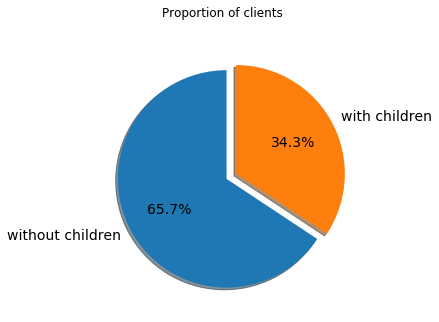

In [91]:
drawPieChart(child_pivot_table.loc[:,'approved'], ['without children','with children'],'Proportion of clients',explode=(0.0,0.1))

More than half of the clients don't have children. Let's take close look at clients with children/without children.

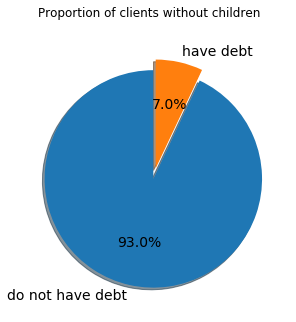

In [92]:
drawPieChart(child_pivot_table.iloc[0,[True,True,False]],['do not have debt','have debt'],'Proportion of clients without children',explode=(0.0,0.1))

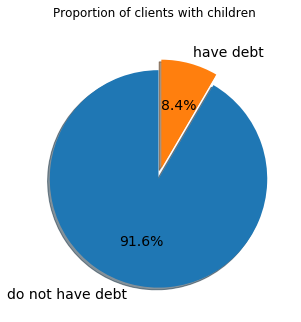

In [93]:
drawPieChart(child_pivot_table.iloc[1,[True,True,False]],['do not have debt','have debt'],'Proportion of clients with children',explode=(0.0,0.1))

As we can see, the proportion of borrowers with children is greater than the proportion of borrowers without children.

Let's see how many children are in families where the proportion of clients in debt is the highest.

In [94]:
# Let's drop the rows - customers without children
with_child = bank_stats.loc[bank_stats.loc[:,'has_children']==True]
# Displaying first 5 rows
with_child.loc[:,['children','has_children']].head()

,children,has_children
0,1,True
1,1,True
3,3,True
8,2,True
10,2,True


In [95]:
with_child_pivot_table = proportionOfDebt(with_child,'children','children',['count','sum'])
# Sorting by 'debt_percent' column
with_child_pivot_table_sorted = with_child_pivot_table.sort_values(by=['debt_percent'],ascending=False)
with_child_pivot_table_sorted

,approved,defaulted,debt_percent
children,,,
2,2114,202.0,9.555345
1,4793,441.0,9.200918
3,328,27.0,8.231707
4,88,5.0,5.681818
5,9,0.0,0.000000


Let's draw a bar plot, showing the debt percent of each category (clients with specific amount of children).

In [96]:
def drawPlot (df,y,title,kind,sizeMax,sizeMin,xlabel,ylabel,ylimMax):
    """ This function draws a bar plot """
    """ df - dataframe """
    """ title - title of the plot """
    """ kind - kind of the plot. In our case, it will be bar, anyway, we can use it for multiple kinds of plots. """
    """ sizeMax, sizeMin - sizes of the plot """
    """ xlabel, ylabel - label names on x and y axis """
    """ ylimMax - max height of the bar on y axis """
    df.plot(title=title,kind=kind,figsize=(sizeMax,sizeMin),y=y)
    plt.xticks(rotation ='horizontal') 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,ylimMax)
    plt.show()

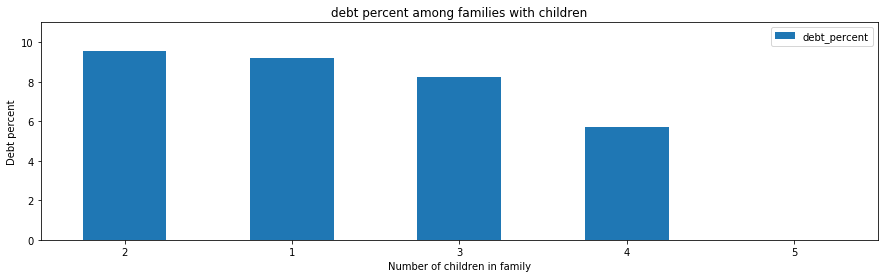

In [97]:
drawPlot(with_child_pivot_table_sorted,'debt_percent',title='debt percent among families with children', kind='bar',sizeMax=15
         ,sizeMin=4,xlabel='Number of children in family',ylabel='Debt percent',ylimMax=11)

In families with 2 or 1 child, the proportion of people in debt is the highest. We found out that clients that have small family, are tend to defaulting. Let's take a close look at small families and large families to prove the fact that we have mentioned earlier.

In [98]:
small_large_family = proportionOfDebt(with_child,'large_family','children',['count','sum'])
#small_large_family = small_large_family.rename(columns={'children': 'approved', 'debt':'defaulted'})
small_large_family.index = ['small family','large family']
small_large_family

,approved,defaulted,debt_percent
small family,6907,643.0,9.309396
large family,425,32.0,7.529412


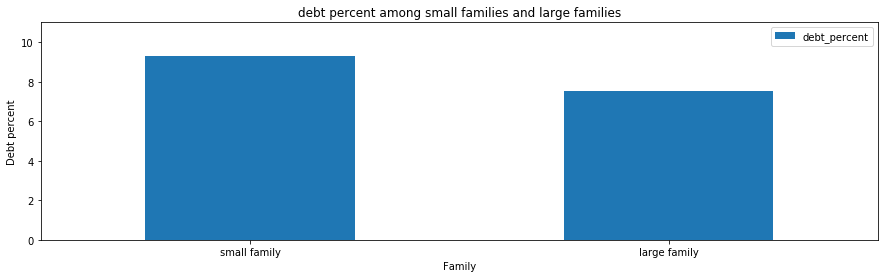

In [99]:
drawPlot(small_large_family,'debt_percent',title='debt percent among small families and large families', kind='bar',sizeMax=15
         ,sizeMin=4,xlabel='Family',ylabel='Debt percent',ylimMax=11)

According to the graph, we prove that clients that have small family, are tend to defaulting. I assume that due the government support, clients with large families are more reliable. Also clients with large families are good at managing their finances than clients with small families, because for each child we need to invest money in development, support, and education. 

## Summary

- **clients that have small family, are tend to defaulting**. I assume that due the government support, clients with large families are more reliable. Also clients with large families are good at managing their finances than clients with small families, because for each child we need to invest money in development, support, and education. 
- In families with 2 or 1 child, the proportion of people in debt is the highest.

<a id="familyStatusImpact"></a>
##  The impact of family status on the repayment of the loan on time

Let's answer to the question whether family status affects the repayment of the loan on time. Who is more responsible: those who are married or single? Let's define the metrics by which we will do the analysis. Useful metrics to answer the question: *family_status* - marital status, *debt* - whether the client had debt before or having a debt.

Let's find the proportion of clients with debt of each family status category.

In [100]:
family_status_prop = proportionOfDebt(bank_stats,'family_status','family_status',['count','sum'])
# Sorting by "debt_percent"
family_status_prop_sorted = family_status_prop.sort_values(by=['debt_percent'],ascending=False)
family_status_prop_sorted

,approved,defaulted,debt_percent
family_status,,,
unmarried,2794,273.0,9.770938
civil partnership,4142,386.0,9.319169
married,12295,927.0,7.539650
divorced,1185,85.0,7.172996
widow / widower,954,62.0,6.498952


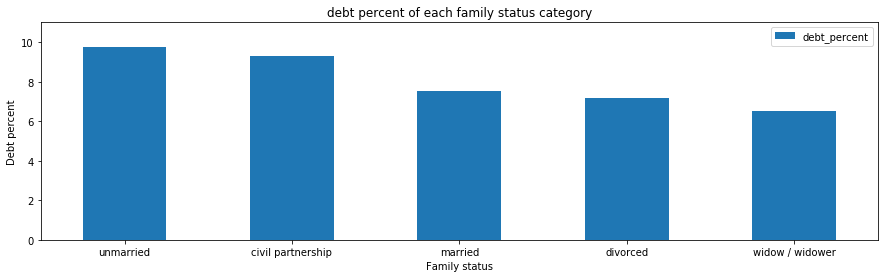

In [101]:
drawPlot(family_status_prop_sorted,'debt_percent',title='debt percent of each family status category', kind='bar',sizeMax=15
         ,sizeMin=4,xlabel='Family status',ylabel='Debt percent',ylimMax=11)

Note that the two categories of *single*, *civil partnership* exceed the average percentage of other categories of clients with debt. Therefore, we can conclude that  affects the repayment of the loan on time.

## Summary

Based on the results, **we can say that family status affects the repayment of the loan on time**. People who are officially married show a more serious and responsible attitude towards loan repayment. Meanwhile, people who are single and not formally married are tend to defaulting. Thus, it is necessary to take family status metrics into account when assessing a potential borrower's credibility.

<a id="levelIncomeImpact"></a>
## Correlation between income level and loan repayment on time

Does the client's income level affect the credibility of the potential borrower?  As always, let's start by identifying the metrics that will help us answer the question. We need the values from the columns: *total_income*,*debt*.

Let's find the proportion of clients with debt of each level of income.

In [102]:
level_income_prop = proportionOfDebt(bank_stats,'level_income','total_income',['count','sum'])
# Sorting by debt_percent
level_income_prop_sorted = level_income_prop.sort_values(by='debt_percent',ascending=False)
level_income_prop_sorted

,approved,defaulted,debt_percent
level_income,,,
middle,4390,383.0,8.724374
high,6294,543.0,8.627264
min,5343,425.0,7.954333
max,5343,382.0,7.149541


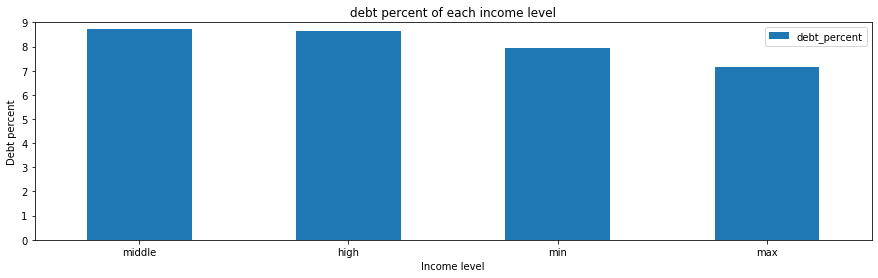

In [103]:
drawPlot(level_income_prop_sorted,'debt_percent',title='debt percent of each income level', kind='bar',sizeMax=15
         ,sizeMin=4,xlabel='Income level',ylabel='Debt percent',ylimMax=9)

The proportion of clients, who have or had debt, with middle and high monthly income is greater than the proportion of clients,who have or had debt, with minimal monthly income. It can be assumed that clients with high and middle monthly income more often fail to pay the loan on time than clients with minimum monthly income. If we look at the proportion of clients,who have or had debt, with the maximum monthly income, we can conclude that these customers are self-sufficient and able to pay the loan on time.

## Summary

Based on result, it is hard to find a correlation between monthly income and loan repayment on time. We need to consult with banking specialists when assessing the credibility of the client.

<a id="purposeImpact"></a>
## The impact of loan purposes on its repayment on time

Let's look at how different purposes for a loan affect its repayment on time. Let's find popular purposes for credit.

We need find the proportion of clients with debt of each loan purposes.

In [104]:
purposes_prop = proportionOfDebt(bank_stats,'purpose_type','purpose',['count','sum'])
# Sorting by debt_percent
purposes_prop_sorted = purposes_prop.sort_values(by='debt_percent',ascending=False)
purposes_prop_sorted

,approved,defaulted,debt_percent
purpose_type,,,
car,4286,400.0,9.332711
education,3996,370.0,9.259259
family,2321,184.0,7.927617
real estate,10767,779.0,7.235070


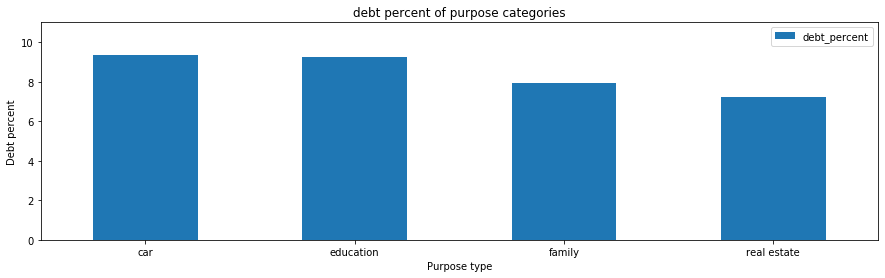

In [105]:
drawPlot(purposes_prop_sorted,'debt_percent',title='debt percent of purpose categories', kind='bar',sizeMax=15
         ,sizeMin=4,xlabel='Purpose type',ylabel='Debt percent',ylimMax=11)

The proportion of debtors with purposes to take a loan for *car* and *education* is greater than the proportion of debtors with purposes for *wedding(family)* and for *real estate*.

Let's find the most popular purposes for getting a loan.

In [106]:
# Sorting by approved
popular_purposes = purposes_prop.sort_values(by='approved',ascending=False)
# Dropping redundant columns
popular_purposes = popular_purposes.drop(['defaulted','debt_percent'],axis=1)
popular_purposes

,approved
purpose_type,
real estate,10767
car,4286
education,3996
family,2321


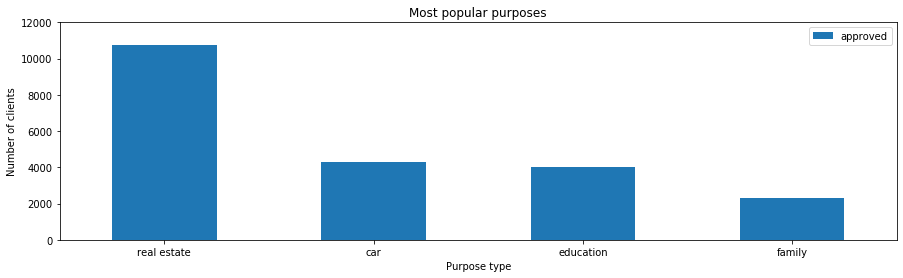

In [107]:
drawPlot(popular_purposes,'approved',title='Most popular purposes', kind='bar',sizeMax=15
         ,sizeMin=4,xlabel='Purpose type',ylabel='Number of clients',ylimMax=12000)

The most popular purpose for getting a loan turned out to be *real estate*. People take out mortgages, everyone wants to have their own home. Second is *car*. Here it makes sense, a car is a convenient means of transportation. Everyone wants to quickly and easily get from point A to point B. Next comes *education* - *3996* customers are interested in improving their education. Maybe some customers want to get a foreign education or quickly learn a profession through online education. A less popular purpose is *family(wedding)*. My guess is that people do not want to take out a loan for a wedding, trying to cover all expenses with the money they earn.

## Summary

Despite the fact that the most popular purpose of getting a loan turned out to be *real estate*, customers are more responsible for the payment of the loan. Meanwhile, we can see customers who take a loan for *education* or for *car* are tend to defaulting. We should pay more attention to customers who are taking a loan for *education* and *car*.

<br>

----

<a id="results"></a>
# Stage 4 - Results of the research

The research showed that:
- **Clients that have small family, are tend to defaulting**. In families with 2 or 1 child, the proportion of people in debt is the highest. I assume that due the government support, clients with large families are more reliable. Also clients with large families are good at managing their finances than clients with small families, because for each child we need to invest money in development, support, and education. 
- **Family status affects the repayment of the loan on time**. People who are officially married show a more serious and responsible attitude towards loan repayment. Meanwhile, people who are single and not formally married are tend to defaulting. Thus, it is necessary to take family status metrics into account when assessing a potential borrower's credibility.
- **It is hard to find a correlation between monthly income and loan repayment on time** due to the proportions of debtors of each level of income were close to each other. We need to consult with banking specialists when assessing the credibility of the client.
- **We should pay more attention to customers who are taking a loan for education and car** when assessing the clients credibility. The proportion of debtors with purposes to take a loan for *car* and *education* is greater than the proportion of debtors with purposes for *wedding(family)* and for *real estate*.

Preferable client will be: officially married, with no children or having a large family(3-5 kids), self-sufficient (having the maximum income), for the purpose of obtaining a loan on real estate.

The results of the research will be useful in building ML [**credit score**](https://en.wikipedia.org/wiki/Credit_score) model that assesses the potential borrower's ability to repay the loan to the bank.